<a href="https://colab.research.google.com/github/blunte3/ML-AI/blob/main/CreditCardApprovalPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1: Using Logistic Regression, I would like to solve credit card approval prediction. Logistic Regression is the best choice for this problem because it is best suitable for binary classification tasks and can calculate the coefficients of each feature while presenting a higher level of transparency and reasoning for its decision making over other ML models. Additionally in this solution, I performed my own evaluation to produce **y** based on varying data in the set.

Task 2: Data - https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Reading the CSV files and checking the head contents.

In [ ]:
df = pd.read_csv("application_record.csv") #data frame for application record history
rf = pd.read_csv("credit_record.csv") #record frame which is labeled rf to represent the credit record data frame

In [ ]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [ ]:
rf.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


Convert the STATUS to numeric and select each ID to add a column to represent how long the account has been opened, and add an OVERDUE column which represents if a user has ever been overdue since opening the account.

In [ ]:
rf['STATUS'] = pd.to_numeric(rf['STATUS'], errors='coerce')
new_rf = rf.groupby('ID')['MONTHS_BALANCE'].min().abs().reset_index(name='OPENED_TIME')
new_rf['OVERDUE'] = new_rf['ID'].map(rf.groupby('ID')['STATUS'].max().between(2, 5).replace({True: 'Yes', False: 'No'}))

Merge the datasets to have one useful dataset

In [ ]:
df = pd.merge(df, new_rf[['ID', 'OPENED_TIME', 'OVERDUE']], on='ID', how='inner')
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,OPENED_TIME,OVERDUE
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,15,No
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,14,No
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,29,No
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,4,No
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,26,No


Convert the OVERDUE Yes and No to numerical representations

In [ ]:
df['OVERDUE'] = df['OVERDUE'].map({'Yes': 1, 'No': 0})

Using numerical descriptions and graphs to visualize the data

In [ ]:
df.drop(columns=['ID']).describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,OPENED_TIME,OVERDUE
count,36457.000000,3.645700e+04,36457.000000,36457.000000,36457.0,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000
mean,0.430315,1.866857e+05,-15975.173382,59262.935568,1.0,0.225526,0.294813,0.089722,2.198453,26.164193,0.016897
std,0.742367,1.017892e+05,4200.549944,137651.334859,0.0,0.417934,0.455965,0.285787,0.911686,16.501854,0.128886
min,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,1.215000e+05,-19438.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,12.000000,0.000000
50%,0.000000,1.575000e+05,-15563.000000,-1552.000000,1.0,0.000000,0.000000,0.000000,2.000000,24.000000,0.000000
75%,1.000000,2.250000e+05,-12462.000000,-408.000000,1.0,0.000000,1.000000,0.000000,3.000000,39.000000,0.000000
max,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,60.000000,1.000000


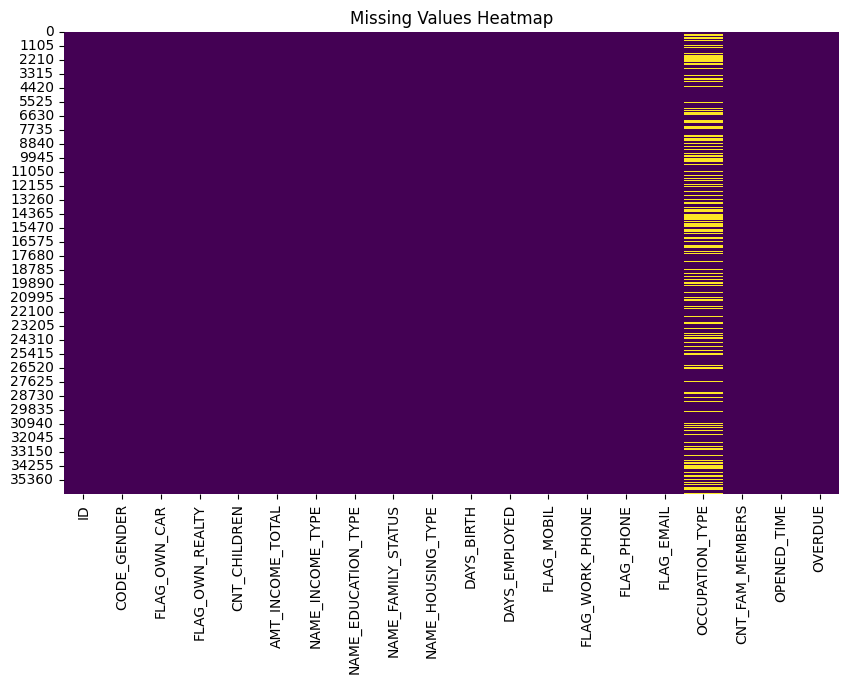

In [ ]:
# Heatmap to visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

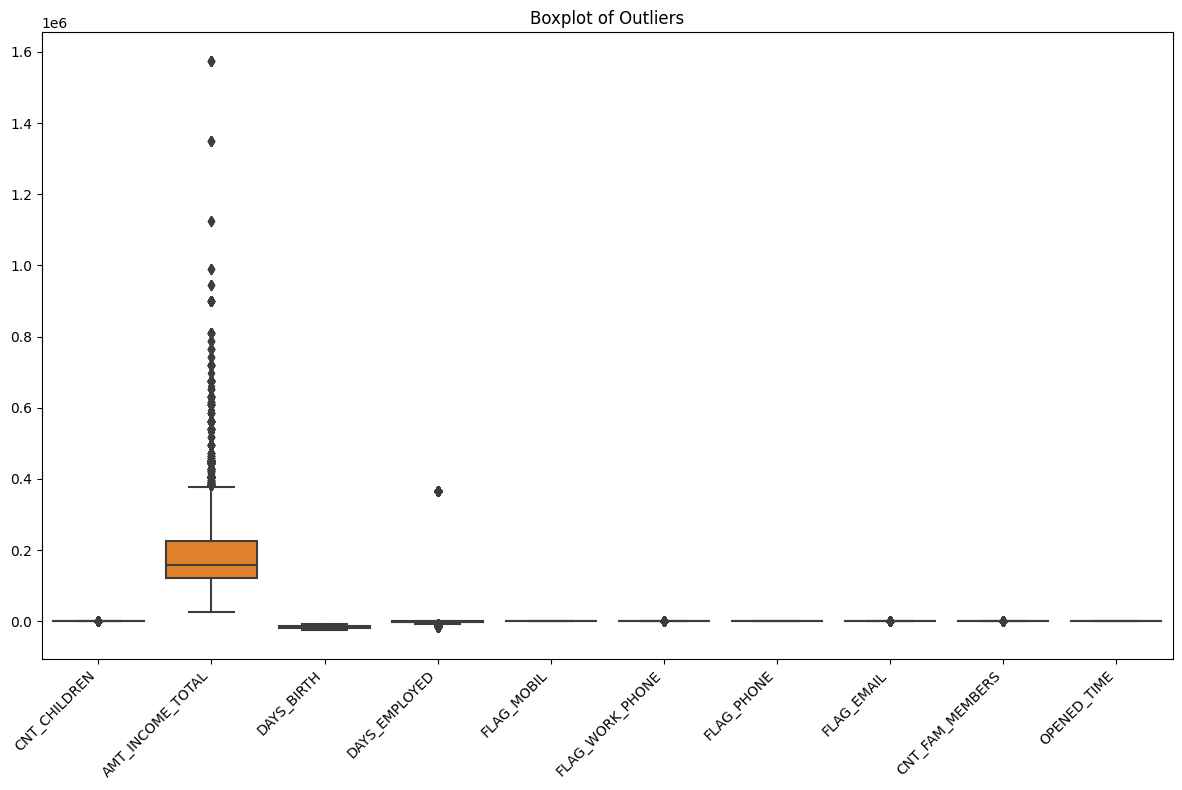

In [ ]:
#Boxplot to visualize outliers in the dataset
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.drop(columns=['ID']))
plt.xticks(rotation=45, ha='right')
plt.title('Boxplot of Outliers')
plt.tight_layout()
plt.show()

In [ ]:
# is the data imbalanced?
df.OVERDUE.value_counts(normalize=True) #normalizes the result

0    0.983103
1    0.016897
Name: OVERDUE, dtype: float64

KeyboardInterrupt: 

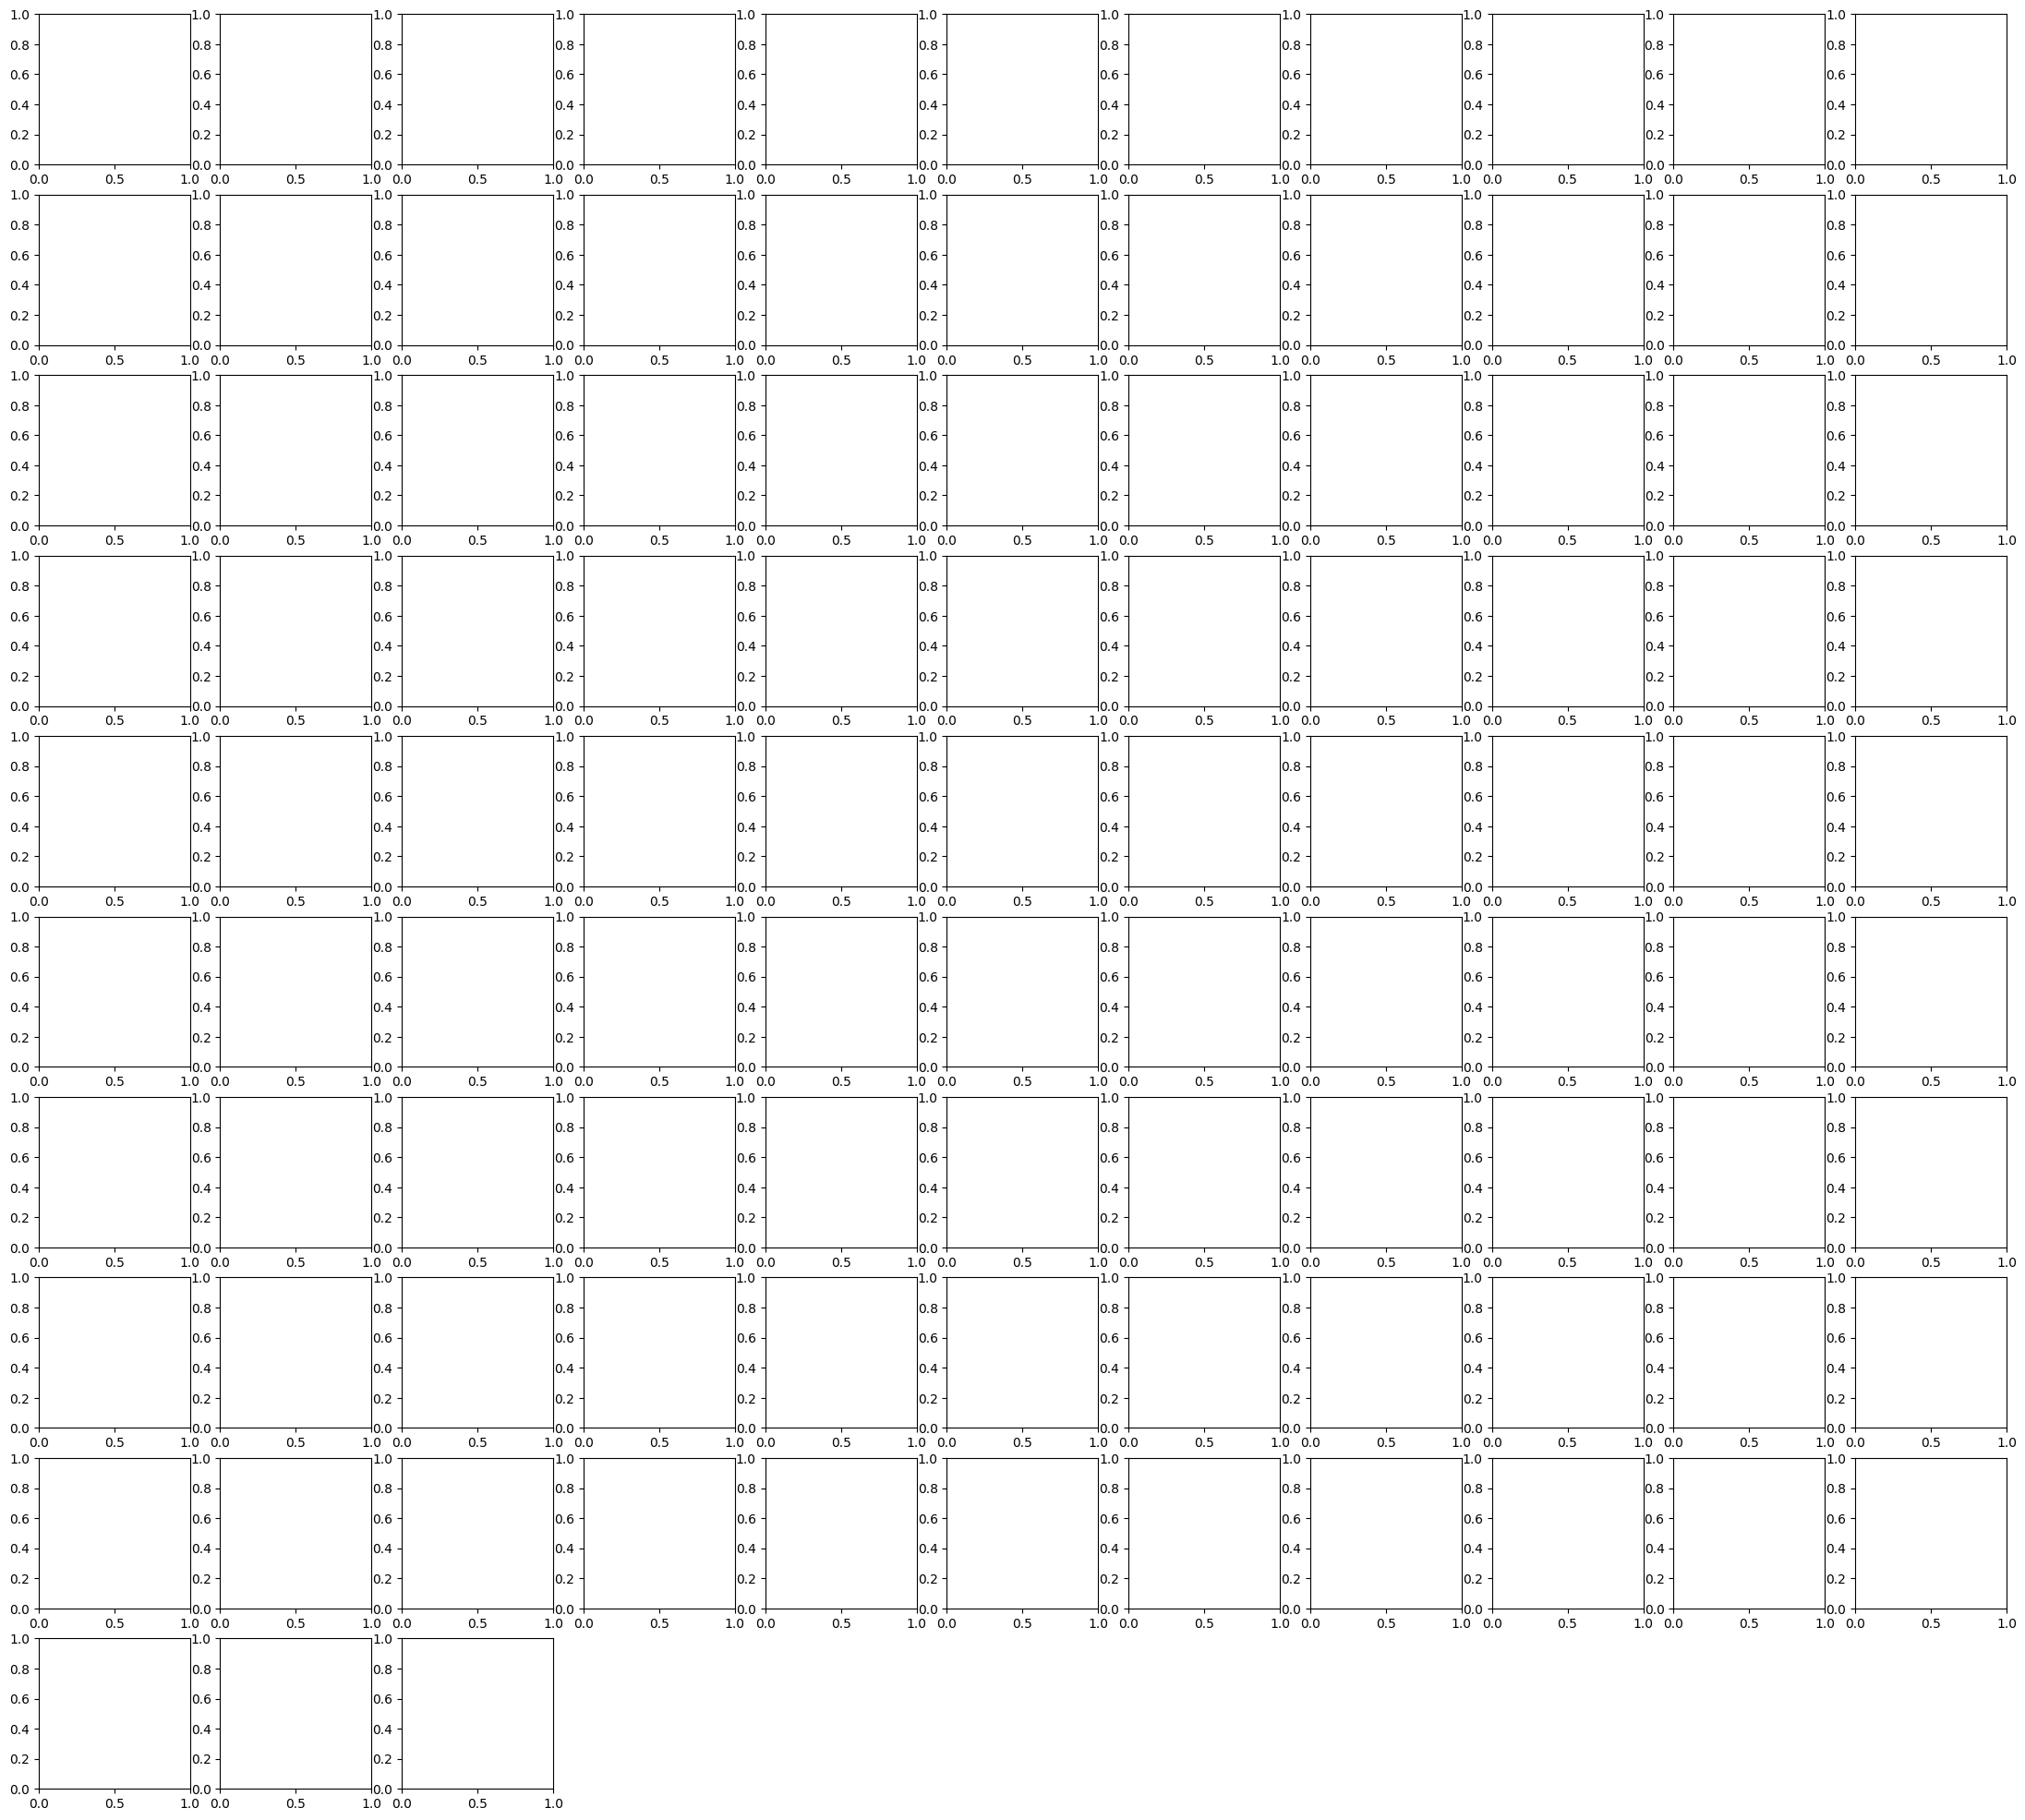

In [ ]:
# ploting pairwise relationships in the dataset
sns.pairplot(df, hue='OVERDUE')

In [ ]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,OPENED_TIME,OVERDUE
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,15,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,14,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,29,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,4,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,26,0


Dropping unecessary columns that don't represent the task at hand. The main reason is to avoid overfitting with too many features and the the secondary reason is that they are unecessary, have missing values, etc. I chose this over regularization because the data doesn't appear to need a high polynomial answer as a linear decision boundary would be the best for the model.

In [ ]:
df = df.drop(columns=['CODE_GENDER', 'CNT_CHILDREN', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'])
df.head()

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OPENED_TIME,OVERDUE
0,5008804,Y,Y,427500.0,Rented apartment,-12005,-4542,15,0
1,5008805,Y,Y,427500.0,Rented apartment,-12005,-4542,14,0
2,5008806,Y,Y,112500.0,House / apartment,-21474,-1134,29,0
3,5008808,N,Y,270000.0,House / apartment,-19110,-3051,4,0
4,5008809,N,Y,270000.0,House / apartment,-19110,-3051,26,0


In [ ]:
#checking unique values to see what to represent numerically
unique_values = df['FLAG_OWN_CAR'].unique()
print(unique_values)

['Y' 'N']


In [ ]:
#Converting the negative values to positive with abs() and changing Y and N values to 1's and 0's
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].abs()
df['DAYS_BIRTH'] = df['DAYS_BIRTH'].abs()
df['FLAG_OWN_REALTY'] = df['FLAG_OWN_REALTY'].str.strip().map({'Y': 1, 'N': 0})
df['FLAG_OWN_CAR'] = df['FLAG_OWN_CAR'].str.strip().map({'Y': 1, 'N': 0})
df.head()

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OPENED_TIME,OVERDUE
0,5008804,1,1,427500.0,Rented apartment,12005,4542,15,0
1,5008805,1,1,427500.0,Rented apartment,12005,4542,14,0
2,5008806,1,1,112500.0,House / apartment,21474,1134,29,0
3,5008808,0,1,270000.0,House / apartment,19110,3051,4,0
4,5008809,0,1,270000.0,House / apartment,19110,3051,26,0


In [ ]:
#finding unique values of housing type to change to numerical representation
unique_values = df['NAME_HOUSING_TYPE'].unique()
print(unique_values)

['Rented apartment' 'House / apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']


In [ ]:
#converting housing type info to numerical representation
df['NAME_HOUSING_TYPE'] = df['NAME_HOUSING_TYPE'].str.strip().map({'Rented apartment': 0, 'House / apartment': 1, 'Municipal apartment': 2, 'With parents': 3, 'Co-op apartment': 4, 'Office apartment': 5})
df.head()

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OPENED_TIME,OVERDUE
0,5008804,1,1,427500.0,0,12005,4542,15,0
1,5008805,1,1,427500.0,0,12005,4542,14,0
2,5008806,1,1,112500.0,1,21474,1134,29,0
3,5008808,0,1,270000.0,1,19110,3051,4,0
4,5008809,0,1,270000.0,1,19110,3051,26,0


In [ ]:
#visualizing the main housing types
value_counts = df['NAME_HOUSING_TYPE'].value_counts(normalize=True) * 100
print(value_counts)

1    89.277779
3     4.871492
2     3.094056
0     1.577201
5     0.718655
4     0.460817
Name: NAME_HOUSING_TYPE, dtype: float64


In [ ]:
#dropping the outliers that make up < 1% of the total dataset
df = df[~df['NAME_HOUSING_TYPE'].isin([4,5])]
df.head()

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OPENED_TIME,OVERDUE
0,5008804,1,1,427500.0,0,12005,4542,15,0
1,5008805,1,1,427500.0,0,12005,4542,14,0
2,5008806,1,1,112500.0,1,21474,1134,29,0
3,5008808,0,1,270000.0,1,19110,3051,4,0
4,5008809,0,1,270000.0,1,19110,3051,26,0


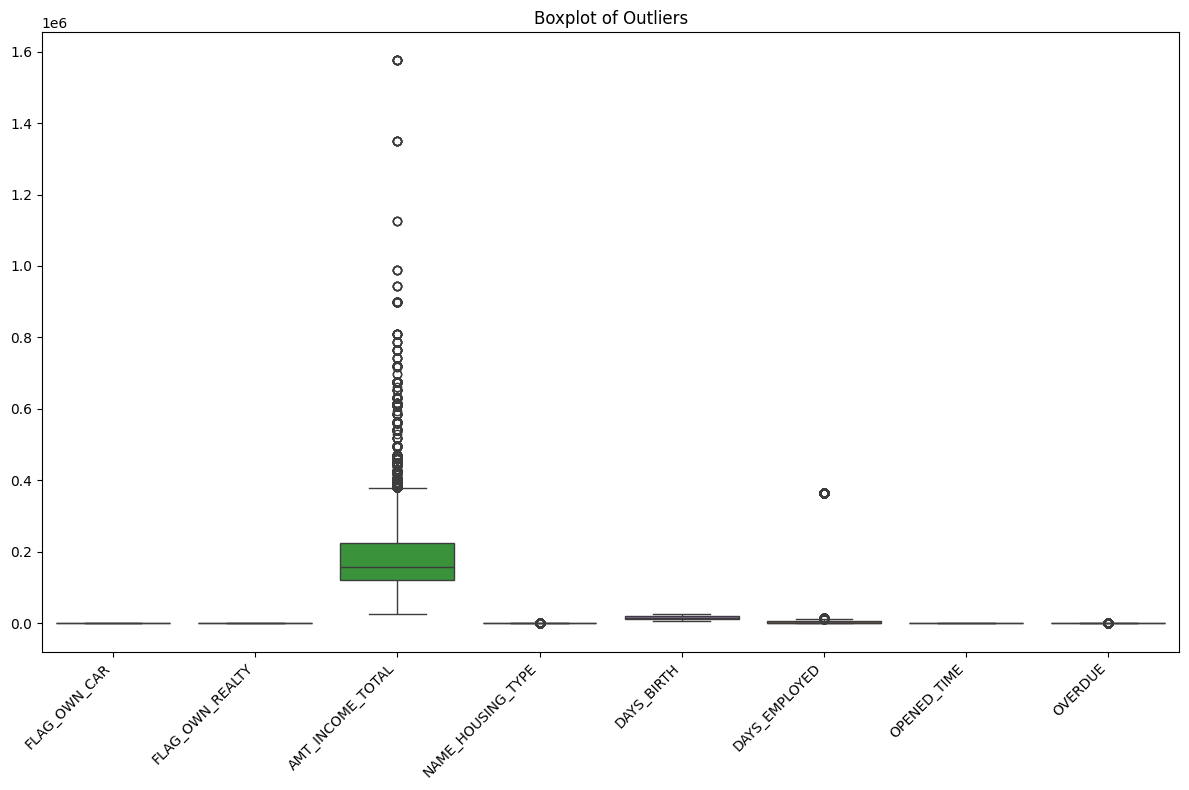

In [ ]:
#Checking for outliers again to see if standardization and normalization is necessary
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.drop(columns=['ID']))
plt.xticks(rotation=45, ha='right')
plt.title('Boxplot of Outliers')
plt.tight_layout()
plt.show()

In [ ]:
df.head()

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OPENED_TIME,OVERDUE
0,5008804,1,1,427500.0,0,12005,4542,15,0
1,5008805,1,1,427500.0,0,12005,4542,14,0
2,5008806,1,1,112500.0,1,21474,1134,29,0
3,5008808,0,1,270000.0,1,19110,3051,4,0
4,5008809,0,1,270000.0,1,19110,3051,26,0


Task 3: Defining the sigmoid and cost function to use 2 variants of gradient descent in their original form

In [ ]:
def sigmoid(z):
  return 1/ (1 + np.exp(-z))

def cost_function(theta, X, y):
  m = len(y)
  h = sigmoid(np.dot(X, theta))
  J = (-1 / m) * np.sum(y * np.log(h) + (1-y) * np.log(1-h))
  return J

def calc_gradient(X, h, y):
  m = len(y)
  gradient = np.dot(X.T, (h - y)) / m

  return gradient

def batch_gradient_descent(X, y, theta, learning_rate=0.01, epochs=100):
    m = len(y)
    for epoch in range(epochs):
        h = sigmoid(np.dot(X, theta))
        gradient = calc_gradient(X, h, y)
        theta -= learning_rate * gradient

        current_cost = cost_function(theta, X, y)
        print(f'Epoch {epoch+1}/{epochs}, Cost: {current_cost}')

    return theta

def stochastic_gradient_descent(X, y, theta, learning_rate=0.01, epochs=100):
    m = len(y)
    for epoch in range(epochs):
        for i in range(m):
            xi = X.iloc[i].values
            h = sigmoid(np.dot(xi, theta))
            gradient = (h - y.iloc[i]) * xi
            theta -= learning_rate * gradient

        current_cost = cost_function(theta, X, y)
        print(f'Epoch {epoch+1}/{epochs}, Cost: {current_cost}')

    return theta

In [ ]:
df.head()

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OPENED_TIME,OVERDUE
0,5008804,1,1,427500.0,0,12005,4542,15,0
1,5008805,1,1,427500.0,0,12005,4542,14,0
2,5008806,1,1,112500.0,1,21474,1134,29,0
3,5008808,0,1,270000.0,1,19110,3051,4,0
4,5008809,0,1,270000.0,1,19110,3051,26,0


Creating the Approval decision boundary to represent the y. The data did not come with one so using online resources in credit approval I formulate my own approval.

In [ ]:
from sklearn.model_selection import train_test_split
features = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'OPENED_TIME', 'OVERDUE']
def determine_approval(row):
    conditions = (
        (row['AMT_INCOME_TOTAL'] > 50000) &
        (row['FLAG_OWN_CAR'] == 1) &
        ((row['NAME_HOUSING_TYPE'] == 1) or (row['NAME_HOUSING_TYPE'] == 3) or (row['NAME_HOUSING_TYPE'] == 0)) &
        (row['FLAG_OWN_REALTY'] == 1) &
        (row['DAYS_BIRTH'] > 12000) &
        (row['DAYS_EMPLOYED'] > 1000) &
        (row['OPENED_TIME'] > 3) &
        (row['OVERDUE'] == 0)
    )
    return 1 if conditions else 0

df['APPROVAL'] = df.apply(determine_approval, axis=1)

df = df[features + ['APPROVAL']]


Standardize and normalize the data to prevent outliers and ease of model computation

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

column_to_standardize = 'AMT_INCOME_TOTAL'

# Standardize the selected column excluding 'ID'
scaler_standardize = StandardScaler()
df[column_to_standardize] = scaler_standardize.fit_transform(df[column_to_standardize].values.reshape(-1, 1))

# Exclude 'ID' and 'APPROVAL' from normalization
columns_to_normalize = [col for col in df.columns if col != 'ID' or col != 'APPROVAL']
scaler_normalize = MinMaxScaler()
df[columns_to_normalize] = scaler_normalize.fit_transform(df[columns_to_normalize])

In [ ]:
approval_counts = df['APPROVAL'].value_counts()
print(approval_counts)

0.0    30963
1.0     5064
Name: APPROVAL, dtype: int64


In [ ]:
#Splitting the data set into train and test sets with X and y
X_train, X_test, y_train, y_test = train_test_split(df[features], df['APPROVAL'], test_size=0.2, random_state=42)

Finding and predicting theta and predictions for both gradient descents based on logistic regression. Threshold is 0.5 as false positives and false negatives aren't as big of a concern as say a CIA HQ. And 0.5 is a standard default.

In [ ]:
theta_initial = np.zeros(X_train.shape[1])

theta_batch = batch_gradient_descent(X_train, y_train, theta_initial, learning_rate=1, epochs=1000)

theta_stochastic = stochastic_gradient_descent(X_train, y_train, theta_initial, learning_rate=.03, epochs=100)

predictions_batch = sigmoid(np.dot(X_test, theta_batch))
predictions_stochastic = sigmoid(np.dot(X_test, theta_stochastic))

binary_predictions_batch = (predictions_batch >= 0.5).astype(int)
binary_predictions_stochastic = (predictions_stochastic >= 0.5).astype(int)

Epoch 1/1000, Cost: 0.5959388598577059
Epoch 2/1000, Cost: 0.5481372643190224
Epoch 3/1000, Cost: 0.52165482141396
Epoch 4/1000, Cost: 0.5050411616740109
Epoch 5/1000, Cost: 0.4934155853815853
Epoch 6/1000, Cost: 0.48452446901714663
Epoch 7/1000, Cost: 0.47724773513441116
Epoch 8/1000, Cost: 0.47099350224200376
Epoch 9/1000, Cost: 0.46543254000023937
Epoch 10/1000, Cost: 0.46037327379348225
Epoch 11/1000, Cost: 0.45569938890174344
Epoch 12/1000, Cost: 0.45133716056335405
Epoch 13/1000, Cost: 0.4472376789818069
Epoch 14/1000, Cost: 0.443366876773136
Epoch 15/1000, Cost: 0.4396997945663593
Epoch 16/1000, Cost: 0.4362172170992636
Epoch 17/1000, Cost: 0.43290366647934864
Epoch 18/1000, Cost: 0.42974618683738103
Epoch 19/1000, Cost: 0.4267335970933797
Epoch 20/1000, Cost: 0.42385602370580727
Epoch 21/1000, Cost: 0.42110460237349695
Epoch 22/1000, Cost: 0.4184712824728009
Epoch 23/1000, Cost: 0.415948694442684
Epoch 24/1000, Cost: 0.41353005609029786
Epoch 25/1000, Cost: 0.4112091032598149
E

Using the results to find different scoring metrics for the efficiency of the model.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy_batch = accuracy_score(y_test, binary_predictions_batch)
precision_batch = precision_score(y_test, binary_predictions_batch)
recall_batch = recall_score(y_test, binary_predictions_batch)
f1_batch = f1_score(y_test, binary_predictions_batch)
confusion_matrix_batch = confusion_matrix(y_test, binary_predictions_batch)

accuracy_stochastic = accuracy_score(y_test, binary_predictions_stochastic)
precision_stochastic = precision_score(y_test, binary_predictions_stochastic)
recall_stochastic = recall_score(y_test, binary_predictions_stochastic)
f1_stochastic = f1_score(y_test, binary_predictions_stochastic)
confusion_matrix_stochastic = confusion_matrix(y_test, binary_predictions_stochastic)

print("Results for Batch Gradient Descent:")
print(f"Accuracy: {accuracy_batch}")
print(f"Precision: {precision_batch}")
print(f"Recall: {recall_batch}")
print(f"F1 Score: {f1_batch}")
print(f"Confusion Matrix:\n{confusion_matrix_batch}")

print("\nResults for Stochastic Gradient Descent:")
print(f"Accuracy: {accuracy_stochastic}")
print(f"Precision: {precision_stochastic}")
print(f"Recall: {recall_stochastic}")
print(f"F1 Score: {f1_stochastic}")
print(f"Confusion Matrix:\n{confusion_matrix_stochastic}")

Results for Batch Gradient Descent:
Accuracy: 0.9095198445739662
Precision: 0.6473807662236122
Recall: 0.8046647230320699
F1 Score: 0.7175043327556325
Confusion Matrix:
[[5726  451]
 [ 201  828]]

Results for Stochastic Gradient Descent:
Accuracy: 0.9095198445739662
Precision: 0.6473807662236122
Recall: 0.8046647230320699
F1 Score: 0.7175043327556325
Confusion Matrix:
[[5726  451]
 [ 201  828]]


Using a package to implement 2 optimization algorithms to compare results/algorithms.

In [ ]:
from sklearn.linear_model import LogisticRegression

model_mini_batch = LogisticRegression(solver='sag', max_iter=100, random_state=42)

model_mini_batch.fit(X_train, y_train)

predictions_mini_batch = model_mini_batch.predict(X_test)

accuracy_mini_batch = accuracy_score(y_test, predictions_mini_batch)
print(f"Accuracy using Mini-Batch Gradient Descent: {accuracy_mini_batch}")

model_adam = LogisticRegression(solver='lbfgs', max_iter=100, random_state=42)

model_adam.fit(X_train, y_train)

predictions_adam = model_adam.predict(X_test)

accuracy_adam = accuracy_score(y_test, predictions_adam)
print(f"Accuracy using Adam Optimizer: {accuracy_adam}")

model_batch = LogisticRegression(solver='lbfgs', max_iter=100, random_state=42)

model_batch.fit(X_train, y_train)

predictions_batch = model_batch.predict(X_test)

accuracy_batch = accuracy_score(y_test, predictions_batch)
print(f"Accuracy using Batch Gradient Descent: {accuracy_batch}")

Accuracy using Mini-Batch Gradient Descent: 0.9400499583680266
Accuracy using Adam Optimizer: 0.9399111851235082
Accuracy using Batch Gradient Descent: 0.9399111851235082


The overall accuracy was best in mini-batch gradient descent. The results were slightly better than the original logistic regression gradient descent used. This is expected as implementing optimization algorithms, such as Mini-Batch Gradient Descent and Adam Optimizer, is crucial for credit card approval prediction tasks. These algorithms offer faster convergence and increased efficiency which is essential for accurate and timely decision-making in credit card approval scenarios. However, their usage should be considered carefully, especially when interpretability may be a concern. For evaluation, metrics like accuracy, precision, recall, and F1 score provide a comprehensive understanding of the model's performance, allowing the assessment of its ability to accurately approve deserving applications while minimizing the risk of approving undesirable ones. The choice of optimization algorithms should align with the specific characteristics and requirements of the credit card approval task, and for this the best was Mini-Batch gradient descent.